
# Using APIs

In [ ]:
# Please inlcude your names below
# Also, please edit the name of the file and include the names of the two(or three) people answering

# Pair answering the assignment: Eleonora Pura, Christian Skorski
# Pair giving feedback: Dominik Frauchiger, David Steiger, Tim Moser

In [2]:
import requests
import json
import os

## 1. Google books
### Setting the request URL parameters
You can set the parameters of the API request according to the documentation below. The first part of the request is always the same, and the "q" which stands for question will take various parameters. <br>
More documentation can be found at: https://developers.google.com/books/docs/v1/using?hl=vi#ids

<img src="parameters.png" width=80%> </img>

**Example**: `https://www.googleapis.com/books/v1/volumes?q=isbn:9780141909882` returns information about the book with the given ISBN number (Everything is illuminated by Jonathan Safran Foer).

**Exercise**

1. Using the above parameters create the following request URLs!
    1. Requesting books that have "potter" in the title
    2. Requesting books that have "doyle" as author
    3. With isbn "1904633684"
    4. With id "2bGdK8CRKoEC"
    5. Second result page when searching books that has "detective" listed in the category list
    6. Second result page when searching books that have "potter in the title but showing 40 results in one page, not 10. 
<br>

Try and see whether they work with `requests.get()`!

In [3]:
result_A = "https://www.googleapis.com/books/v1/volumes?q=intitle:potter"
result_B = "https://www.googleapis.com/books/v1/volumes?q=inauthor:doyle"
result_C = "https://www.googleapis.com/books/v1/volumes?q=isbn:1904633684"
result_D = "https://www.googleapis.com/books/v1/volumes?q=id:2bGdK8CRKoEC"
result_E = "https://www.googleapis.com/books/v1/volumes?q=subject:detective&startIndex=10"
result_F = "https://www.googleapis.com/books/v1/volumes?q=intitle:potter&maxResults=40"

#check with requests

requests.get(result_A).text
requests.get(result_B).text
requests.get(result_C).text
requests.get(result_D).text
requests.get(result_E).text
requests.get(result_F).text

#continue to check all your URLs this way!

'{\n "kind": "books#volumes",\n "totalItems": 494,\n "items": [\n  {\n   "kind": "books#volume",\n   "id": "e5XGeVw23O8C",\n   "etag": "SA4ej2hpklw",\n   "selfLink": "https://www.googleapis.com/books/v1/volumes/e5XGeVw23O8C",\n   "volumeInfo": {\n    "title": "Harry Potter - ein Literatur- und Medienereignis im Blickpunkt interdisziplinärer Forschung",\n    "authors": [\n     "Christine Garbe"\n    ],\n    "publisher": "LIT Verlag Münster",\n    "publishedDate": "2006",\n    "industryIdentifiers": [\n     {\n      "type": "ISBN_10",\n      "identifier": "3825872424"\n     },\n     {\n      "type": "ISBN_13",\n      "identifier": "9783825872427"\n     }\n    ],\n    "readingModes": {\n     "text": false,\n     "image": true\n    },\n    "pageCount": 326,\n    "printType": "BOOK",\n    "categories": [\n     "Children\'s stories, English"\n    ],\n    "averageRating": 1.0,\n    "ratingsCount": 1,\n    "maturityRating": "NOT_MATURE",\n    "allowAnonLogging": true,\n    "contentVersion": "2

1G. Define a function that sends a request to the google books API with the URL parameters as inputs to the function. Try to incorporate as many as the variables as possible and output a URL according to the settings you want to have. Don't forget to write a docstring explaning how the function works. Docstrings are explanations to functions, describing the input, output, and purpose of the function. If you haven't used them before, you can find more examples for example at: https://www.geeksforgeeks.org/python-docstrings/

In [10]:
def request_books_api(keyword:str, value="", dic = {}):
    '''
    This function performs requests to the google book API.
    
    Parameters:
        keyword: keywords that you can specify in the search term to search for particula fields
        value: value for the particular keywords
        dic: dictionary that contains other keyword-value pairs to continue the query (e.g. {"startIndex":10})
        
    Returns:
        The results of the API request, so a dictionary containing key-value pair information about each result
    '''
    if value != "":
        if dic != {}:  
            url = "https://www.googleapis.com/books/v1/volumes?q={}:{}&{}={}".format(keyword, value, list(dic.keys())[0], list(dic.values())[0])
        
        url = "https://www.googleapis.com/books/v1/volumes?q={}:{}".format(keyword, value)
    
    
    else:
        url = "https://www.googleapis.com/books/v1/volumes?q={}".format(keyword)
        
        
    return requests.get(url).text

request_books_api("inauthor", "freud", {"maxResults":40})
    
    

'{\n "kind": "books#volumes",\n "totalItems": 499,\n "items": [\n  {\n   "kind": "books#volume",\n   "id": "RAoMBAAAQBAJ",\n   "etag": "aj9RjFDPtDg",\n   "selfLink": "https://www.googleapis.com/books/v1/volumes/RAoMBAAAQBAJ",\n   "volumeInfo": {\n    "title": "Anna Freud",\n    "authors": [\n     "Anna Freud"\n    ],\n    "publisher": "Böhlau Verlag Wien",\n    "publishedDate": "2014",\n    "description": "Die Herausgeberin Brigitte Spreitzer macht die literarischen Texte von Sigmund Freuds jüngster Tochter Anna Freud zum ersten Mal vollständig zugänglich und liest sie in der Einführung zur Edition als paradigmatische Dokumente der Aus-einandersetzung einer jungen Frau aus dem assimilierten jüdischen Bürgertum mit den sozi¬alhistorischen und kulturellen Bedingungen im Wien der Jahrhundertwende. Damit werden sie als Teil eines historischen Prozesses begreifbar gemacht, der durch das Ringen von Frauen um Zutritt zu Kultur, Bildung und Wissen gekennzeichnet ist. So werden Verbindungslinie

#### Status codes

Responses contain information even without looking into the textual content. printing the response tells us the URL we requested, the date, its status, the content type and the size of the response object

The most important for us is the status: it tells us whether our request has been successful: You can find a list of HTTP status codes here https://en.wikipedia.org/wiki/List_of_HTTP_status_codes.
Or, you can always check HTTP Status Cats: https://www.flickr.com/photos/girliemac/sets/72157628409467125

The most important status codes for us are:

- successful call: code 200
- client error: 4xx, e.g. 401: Unauthorized, 404: Not found
- server error: 5xx, e.g. 500: Internal Server Error, 502: Bad Gateway

### 2. Parsing json

1. Using the previously defined function, query the book with isbn number 1904633684 and print the text of the result. 

In [13]:
print(request_books_api("isbn", 1904633684))

{
 "kind": "books#volumes",
 "totalItems": 1,
 "items": [
  {
   "kind": "books#volume",
   "id": "tBasGxqDMbMC",
   "etag": "1GU8jEcB/WU",
   "selfLink": "https://www.googleapis.com/books/v1/volumes/tBasGxqDMbMC",
   "volumeInfo": {
    "title": "The Case-book of Sherlock Holmes",
    "authors": [
     "Arthur Conan Doyle"
    ],
    "publisher": "Collector's Library",
    "publishedDate": "2004",
    "description": "The Casebook of Sherlock Holmes contains Conan Doyle's last twelve stories about his great fictional detective. Compared with earlier collections these tales are darker, exploring such themes as treachery, mutilation and the terrible consequences of infidelity, and containing such gothic touches as a blood-sucking vampire and crypts at midnight. With an Afterword by David Stuart Davies, a Fellow of the Royal Literary Fund, and an authority on Sherlock Holmes. He has written the Afterwords for all the Collector's Library Holmes volumes.",
    "industryIdentifiers": [
     

2. Now load the previous response into a json object.:

In [32]:
result = request_books_api("isbn", 1904633684)
jsn_result = json.loads(result)
print(jsn_result)

{'kind': 'books#volumes', 'totalItems': 1, 'items': [{'kind': 'books#volume', 'id': 'tBasGxqDMbMC', 'etag': '1GU8jEcB/WU', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/tBasGxqDMbMC', 'volumeInfo': {'title': 'The Case-book of Sherlock Holmes', 'authors': ['Arthur Conan Doyle'], 'publisher': "Collector's Library", 'publishedDate': '2004', 'description': "The Casebook of Sherlock Holmes contains Conan Doyle's last twelve stories about his great fictional detective. Compared with earlier collections these tales are darker, exploring such themes as treachery, mutilation and the terrible consequences of infidelity, and containing such gothic touches as a blood-sucking vampire and crypts at midnight. With an Afterword by David Stuart Davies, a Fellow of the Royal Literary Fund, and an authority on Sherlock Holmes. He has written the Afterwords for all the Collector's Library Holmes volumes.", 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '1904633684'}, {'type': 'ISBN_1

3. What are the highest level keys of the json object?

In [33]:
for key in jsn_result.keys():
    print(key)

kind
totalItems
items


4. What is the type of the value of 'items' key?

In [34]:
print(type(jsn_result['items']))

<class 'list'>


5. Parse the following information from the json object

In [35]:
### Total number of items returned by the request

print("Total items : {}".format(jsn_result['totalItems']))


### Title of the book

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Title: {}".format(dic['title']))


### Authors of the book

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Authors: {}".format(dic['authors']))


### Date of publishing

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Date of publishing: {}".format(dic['publishedDate']))


### Page Count

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Page Count: {}".format(dic['pageCount']))
    
### Categories

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Categories: {}".format(dic['categories']))
    
### Average Rating

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Average Rating: {}".format(dic['averageRating']))

### Rating Count

for el in jsn_result["items"]:
    dic = el['volumeInfo']
    print("Rating Count: {}".format(dic['ratingsCount']))


### Is it avaliable as Epublication (Epub)

for el in jsn_result["items"]:
    dic = el['accessInfo']
    print("Availaible as Epublication: {}".format(dic['epub']['isAvailable']))


Total items : 1
Title: The Case-book of Sherlock Holmes
Authors: ['Arthur Conan Doyle']
Date of publishing: 2004
Page Count: 304
Categories: ['Detective and mystery stories']
Average Rating: 3.5
Rating Count: 23
Availaible as Epublication: False


Unlike in the case of requesting books by IDs, the requests in which you search for author or title usually have more than one book as a result. Try searching for books that contain a specific word in their title.

6. Once you obtain the result of the request as a json object, loop through all books in the json and print out the **title** of all the books. 

In [36]:
result2 = request_books_api("intitle", "connotation")
jsn_result2 = json.loads(result2)

for el in jsn_result2["items"]:
    dic2 = el['volumeInfo']
    print("Title: {}".format(dic2['title']))


Title: Connotation and Meaning
Title: Negative Connotation Among English Verbs with Marked Onsets
Title: Connotation and Denotation in a Work of Film Art
Title: A Discussion of Laterite Especially in Respect to the Original Connotation of the Term
Title: The New Normal of China's Economy: Connotation and Measurement
Title: The Effect of Restraint, Image Connotation and Image Type Upon Interference Scores in a Picture-word Interference Task
Title: Denotation and Connotation in Strategic International Human Resource Management
Title: The Reliability and Interrelational Characteristics of Rated Frequency, Pronunciability, and Affective Connotation for 100 Words
Title: The Doctrine of Connotation and Denotation
Title: Conflict's Connotation


7. Now search for books with a category and print out the authors

In [37]:
result3 = request_books_api("subject", "cooking")
jsn_result3 = json.loads(result3)

for el in jsn_result3["items"]:
    dic3 = el['volumeInfo']
    print("Authors: {}".format(dic3['authors']))

Authors: ['Karen Jean Matsko Hood']
Authors: ['John T. Edge']
Authors: ['Lisa Vanderpump']
Authors: ['Brier Tyler', 'Natalie Moir']
Authors: ['Joan Nathan']
Authors: ['Harley Pasternak, M.Sc.', 'Myatt Murphy']
Authors: ['Paul Hollywood']
Authors: ['David Perlmutter']
Authors: ['Alon Shaya']
Authors: ['Chris Ying', 'René Redzepi', 'MAD']


8. Define a function that given an item in the json object (the meta information about one book) returns a list with the following attributes: `title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub`. 
<br>
Note that **not** every book has all the features required. If a piece of information is missing, your code should write NaN instead in place of the value. 

In [40]:
def parse_json(j):
    '''the function takes a book item as an input and returns a list of the extracted features'''
    for el in j["items"]:
        dic = el['volumeInfo']
        
        title = dic['title']
        authors = dic['authors']
        publishedDate = dic['publishedDate']
        pageCount = dic['pageCount']
        categories = dic['categories']
        averageRating = dic['averageRating']
        ratingsCount = dic['ratingsCount']
        
        dic2 = el['accessInfo']
        epub = dic2['epub']
    
    return title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub


parse_json(jsn_result)


('The Case-book of Sherlock Holmes',
 ['Arthur Conan Doyle'],
 '2004',
 304,
 ['Detective and mystery stories'],
 3.5,
 23,
 {'isAvailable': False})

### 3. New York Times API

Your task in this exercise will be to compare the amount of Brexit, Trump and Corona related articles in the last 6 months, using an API that the New York Times provides. 

Start with creating an API key on the NYT API website. As you can see there are multiple functionalities/APIs that the NYT provides. For this exercise we will use the one that allows you to search among articles. so when you sign up for the API key, make sure to pick that one. 

Here's the documentation for using this API, it explains the syntacs of queries: https://developer.nytimes.com/docs/articlesearch-product/1/overview 

1. How can you specify a keyword to search for in the URL?
2. How can you specify a date or multiple dates to search for?
3. Write a function that takes a query to the API as an input and returns the number of hits (number of article results) that this query returns. 
4. How many results are in a response json by default? How would you collect all results for a specific search? Either write an example code that in fact collects all articles for a query (in an example that has more than one page of results) or explain in detail how you would automate this process. You can use the function you created in 3. to automatically determine how may pages you have to loop through. 

Now you have all the pieces together to write a function that collects all results for a specific topic (keyword) written on a specific date. Remember, that our original question was how the appearance of 3 topics changed over time in the last 6 months. 

5. Loop through all dates in the last 6 months and figure out how many articles there were in each of the 3 topics. You can aggregate into weekly or monthly buckets. You can also include synonyms of the given words (e.g. "Covid-19" for "Corona") or also search other terms that interest you.

Using the below code, you can do a visualization of your findings. 

Trick for pretty printing json:
when dealing with large json objects and trying to understand them, it is often difficult to read them on the screen. Use pprint library to see a nicer version of these jsons. (from pprint import pprint, and pprint("hello world"))

#### Visualization

To help you out with the visualization, we have created the code below. In the description of the function you can find instructions on how to use it. There is also an example of a call underneath the function.

You need to give two parameters to the function. The first one is a dictionary where the keys are the three search query terms that you have used (given as a string); for each term there is one list with the number of queries per each time-block considered. The second parameter is a list of strings with the names of the time periods being considered. 

Important note: the lengths of the lists must match. It is assumed that for each query there is a vector having the number of hits per each period specified in the list of the second parameter. This means that the three lists in the dictionary and the list given as the second parameter must have equal lengths.

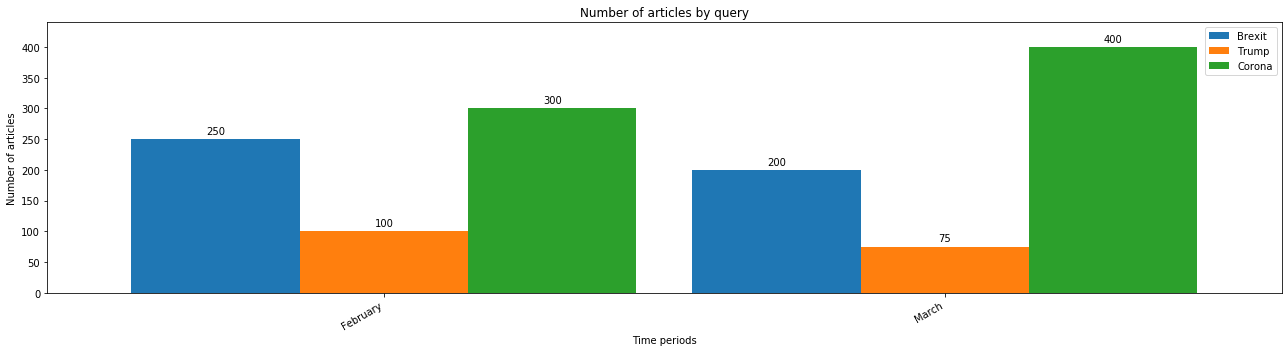

In [1]:
# This is a pre-implemented function for crating the visualisation
# You don't have to modify this

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_no_articles(dictionary_results, periods):
    '''
    Plots the statistics with the number of articles in the past month.
    
    dictionary_results = dictionary of the form query_term: [no_articles_for_period_1, no_articles_for_period_2, ...]
        e.g. {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
             if you group articles by month periods, and 
             you have looked only at the past two months, and
             there were 250 hits for Brexit in February, and 200 in March, and
             there were 100 hits for Trump in February, and 75 in March, and
             there were 300 hits for Corona in February, and 400 in March
    periods = list of time periods used for the investigation
        e.g. ['February', 'March']
             if you have considered the past two months
    '''
    d = dictionary_results
    labels = periods
    query_terms = list(d.keys())
    list_0 = d[query_terms[0]]
    list_1 = d[query_terms[1]]
    list_2 = d[query_terms[2]]
    
    # locations for labels
    x = np.arange(0, len(labels))
    # width per bar
    width = 0.3
    
    # Building the subplots
    fig, ax = plt.subplots(figsize=(18,5))
    rects1 = ax.bar(x - width, list_0, width, label=query_terms[0])
    rects2 = ax.bar(x, list_1, width, label=query_terms[1])
    rects3 = ax.bar(x + width, list_2, width, label=query_terms[2])

    # Labeling
    ax.set_xlabel('Time periods')
    ax.set_ylabel('Number of articles')
    ax.set_title('Number of articles by query')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.autoscale()
    xmin = -2*width
    xmax = max(np.arange(len(labels)))+2*width
    ymin = 0
    ymax = max(list_0+list_1+list_2)*1.1 
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.legend(loc='best')


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() /2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()

# Below there is one example of how to use the above plot function
dict_results2 = {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
plot_no_articles(dict_results2, ['February', 'March'])


#### Your solution for the third exercise

In [ ]:
### Code for task 3

In [ ]:
### Code for task 4

In [ ]:
### Code for task 5

Congratulations for completing the second notebook! Now it’s time for feedback.
1.	Pass your solution to the other pair in your group.
2.	Include your feedback in the other pair’s notebook. Don’t forget to add your names at the top.
3.	Return the notebook with feedback to the original pairs.
4.	Upload your notebook, with the feedback included by the other pair on OLAT.

You can think of/suggest (among other things)
 - improvements in the code (e.g. readability, efficiency)
 - improvements in the answers (e.g. are they easy to understand, are they correct, how can they be improved?)
 - point out differences (e.g. are there any differences between the responses of the two pairs? if yes what are they, what is the cause, and in which way can they be useful?)
 
Not all suggestions about the type of feedback apply to all types of questions. Try to give feedback in a meaningful and constructive way.

In [ ]:
# Below there is space for giving feedback. This space should be used only by the other pair in your group.

'''
Feedback here
'''